In [2]:
!pip install sentence_transformers pinecone-client datasets seaborn matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.4/179.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.9 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=ce7bd9fe426efd775ed7e2923741709e0df8faaeea51f948eefced0abf93eb53
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully buil

In [1]:
import torch
import os
# from transformers import TrainingArguments

# Check if CUDA (GPU support) is available
if torch.cuda.is_available():
    # Get the current device
    device = torch.device('cuda')
    print(device)
    current_device = torch.cuda.current_device()
    num_gpus = torch.cuda.device_count()
    # Get the name of the GPU
    gpu_name = torch.cuda.get_device_name(current_device)
    print(num_gpus)

    print(f"PyTorch is using GPU: {gpu_name}")
else:
    # If CUDA is not available, use CPU
    device = torch.device('cpu')
    print("PyTorch is using CPU")

cuda
1
PyTorch is using GPU: NVIDIA GeForce RTX 2070 SUPER


In [3]:
import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
# os.environ["CUDA_VISIBLE_DEVICES"]="0";
os.environ["CUDA_LAUNCH_BLOCKING"]="1";


In [2]:
import torch
from torch.utils.data import Dataset
from datasets import load_dataset
from transformers import (
    pipeline,
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,TrainingArguments,
    DataCollatorWithPadding

)
import evaluate
# from peft import LoftQConfig, LoraConfig, get_peft_model,PeftModel,PeftConfig

# Read the data


In [3]:
import pandas as pd

sentiment_data_AllSides_train=pd.read_csv("Data/AllSides_train.csv")
sentiment_data_AllSides_test=pd.read_csv("Data/AllSides_test.csv")

sentiment_data_train=pd.read_csv("Data/past_data_train.csv")
sentiment_data_test=pd.read_csv("Data/past_test.csv")

sentiment_data_test_another=pd.read_csv("Data/output_100000.csv")


In [4]:
sentiment_data_test_another.duplicated().sum()

8

In [5]:
sentiment_data_test_another.drop_duplicates(inplace=True)

In [11]:
sentiment_data_test_another["sentiment"].value_counts()

sentiment
negative    1992
neutral     1627
positive     849
Name: count, dtype: int64

In [7]:
sentiment_data_test_another["sentiment"]=sentiment_data_test_another["sentiment"].str.lower()

In [8]:
sentiment_data_test_another=sentiment_data_test_another[sentiment_data_test_another["sentiment"]!="mixed"]

In [9]:
sentiment_data_train

,text,sentiment
0,Will Burnett loads bottled water at a communit...,neutral
1,NMSU announced this week that it is prepared t...,neutral
2,A media environment that tilts to the right is...,negative
3,This post courtesy BBC Earth. For more wildlif...,neutral
4,Remarks recently delivered by a senior enforce...,negative
...,...,...
52807,p.m. Probable starters: Isotopes LHP Harrison ...,negative
52808,The “smartest guys in the room” weren’t smart ...,negative
52809,The Afghan government is moving to bring back ...,negative
52810,Those New Mexico winds also carry a variety of...,negative


In [10]:
sentiment_data_train = pd.concat([sentiment_data_train_tawfik, sentiment_data_train], axis=0)

In [13]:
sentiment_data_train.duplicated().sum()

0

In [21]:
sentiment_data_train.isna().sum()

text         0
sentiment    0
dtype: int64

In [12]:
x=sentiment_data_train["text"]
y=sentiment_data_train["sentiment"]

In [5]:
from sklearn.model_selection import train_test_split
# First, split the data into training and temporary sets
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.1, stratify=y, random_state=42)

# Now, split the temporary set into testing and validation sets
# X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)


In [17]:
X_train

19647    WASHINGTON - Average U.S. rates for fixed mort...
25188    We must make sure he holds up to that promise!...
15857    NYU might have solved one of single-payer’s bi...
29636    Despite a rougher-than-expected second quarter...
31415    Coronavirus Fears Not A Valid Excuse To Reques...
                               ...                        
32366    TOKYO, March 18 (Reuters) - Japanese Prime Min...
9190     CBS News Bosses Irked by Correspondent's Thoro...
1552     KABUL — The Afghan Taliban on Tuesday warned I...
36763    The Justice Department will dispatch 12 federa...
10555    High-profile U.S. races still unresolved two d...
Name: text, Length: 77488, dtype: object

# Load the Saved model

In [15]:
fine_tuned_model = AutoModelForSequenceClassification.from_pretrained("Saved_model_all_model_roberta_roberta_Large_50000")
tokenizer_new = AutoTokenizer.from_pretrained("Saved_model_all_model_roberta_roberta_Large_50000")

# Test the model with 'First Generated Data' that  obtained from the MediaBiasFactCheck website

In [55]:
clean_1_test = sentiment_data_test_another.groupby('sentiment', group_keys=False).apply(lambda x: x.sample(min(len(x), 50)))
clean_1_test = clean_1_test.sample(frac=1, random_state=42)
clean_1_test.dropna(subset=['text'], inplace=True)
clean_1_test

,text,sentiment
3239,It was the first newspaper book I ever purchas...,neutral
116,"WRIGHTSVILLE BEACH, N.C. (AP) — Gov. Roy Coope...",negative
4044,gguy / Shutterstock \nCalifornia lawmakers hav...,positive
141,"BEREA, Ohio — The learning experience has been...",neutral
68,Amidst the hue and cry over the contributions ...,neutral
...,...,...
2511,"In his 11 years in Congress, Representative He...",neutral
2121,"You've probably heard the expression ""cash cow...",positive
1551,DALLAS (AP) — American Airlines has apologized...,negative
1903,"A year ago, reconstitution was the hot remedy ...",neutral


In [58]:
x_test=clean_1_test["text"]
y_test=clean_1_test["sentiment"]

In [59]:
inputs = tokenizer_new(x_test.tolist(),return_tensors="pt",padding='max_length', truncation=True, max_length=512)

In [60]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
fine_tuned_model = fine_tuned_model.to(device)

Using device: cuda


In [61]:
for key in inputs:
    inputs[key] = inputs[key].to(device)

In [62]:
import torch.nn.functional as F
with torch.no_grad():
    #   # Move the input to the GPU
    # encoded_input = {key: value.to(device) for key, value in inputs.items()}

    # # Ensure that the model and input tensors are on the same device
    # for key in encoded_input:
    #     encoded_input[key] = encoded_input[key].to(device)

    outputs =fine_tuned_model(**inputs)

    print (outputs)
    prediction=F.softmax(outputs.logits, dim=1 )
    print (prediction)

    labels= torch.argmax(prediction, dim=1 )
    print(labels)
    classification= [fine_tuned_model.config.id2label[label_id] for label_id in labels.tolist()]

SequenceClassifierOutput(loss=None, logits=tensor([[-1.3819,  1.7361, -0.0144],
        [ 4.0073,  0.0305, -3.2645],
        [-2.6221,  0.0862,  2.3737],
        [-0.6548,  2.4173, -1.1176],
        [ 0.3782,  2.3925, -1.6925],
        [ 4.4810, -0.7208, -3.1120],
        [-0.2828,  2.3153, -1.5063],
        [-2.7299,  0.0888,  2.5802],
        [-1.5661,  2.9053, -1.3520],
        [-3.2372,  2.3666,  1.0941],
        [-3.7531, -0.3846,  4.0611],
        [ 2.9207,  0.7248, -2.8298],
        [ 4.4481, -2.0720, -2.0416],
        [ 4.6047, -1.2800, -2.9097],
        [ 4.7231, -1.9486, -2.4992],
        [ 2.8925,  1.1053, -3.1259],
        [-3.9046,  0.8336,  3.0620],
        [-3.0609,  0.9381,  2.1329],
        [-0.5783,  3.6271, -2.3425],
        [-3.7436,  0.2462,  3.4251],
        [ 1.2815,  1.6867, -2.4649],
        [-3.5804,  0.3160,  3.3690],
        [ 4.5634, -2.1978, -2.0609],
        [-3.1393,  2.6180,  0.6551],
        [-3.6677,  1.1124,  2.8074],
        [-2.3739,  2.9006,  0.01

In [64]:
label_mapping = {"LABEL_1": "neutral", "LABEL_0":"negative", "LABEL_2": "positive"}

classification_nnn_Gan_1= [label_mapping[label_id] for label_id in classification]

In [65]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, classification_nnn_Gan_1))

              precision    recall  f1-score   support

    negative       0.86      0.96      0.91        50
     neutral       0.73      0.76      0.75        50
    positive       0.88      0.74      0.80        50

    accuracy                           0.82       150
   macro avg       0.82      0.82      0.82       150
weighted avg       0.82      0.82      0.82       150



In [66]:
from sklearn.metrics import accuracy_score
accuracy_Gan_1 = accuracy_score(y_test, classification_nnn_Gan_1)

In [ ]:
accuracy_Gan_1

0.8466666666666667

#  Test the model with 'Second Generated Data' that  obtained from the Second Generated Data website


In [66]:
clean_1_test_2 = sentiment_data_AllSides_test.groupby('sentiment', group_keys=False).apply(lambda x: x.sample(min(len(x), 50)))
clean_1_test_2 = clean_1_test_2.sample(frac=1, random_state=42)
clean_1_test_2.dropna(subset=['text'], inplace=True)
clean_1_test_2

,text,sentiment
3039,Let's 'make a deal': Trump moderates tone on N...,neutral
280,"North Korea: US in race to address threat, say...",negative
1082,#ClapBecauseWeCare: World cheers for frontline...,positive
586,"Why Obama's Budget Could Make Health Waves , ...",neutral
2522,"Trump takes in eclipse from White House , Pres...",neutral
...,...,...
1681,"Options narrow to avert fiscal cliff , John Bo...",neutral
1625,Researchers turn adult cells back into stem ce...,positive
1322,Who's more intolerant - liberals or conservati...,negative
1710,"Obama team to clarify health care penalties , ...",neutral


In [67]:
x_test_AllSides=clean_1_test_2["text"]
y_test_AllSides=clean_1_test_2["sentiment"]

In [68]:
inputs_AllSides = tokenizer_new(x_test_AllSides.tolist(),return_tensors="pt",padding='max_length', truncation=True, max_length=512)

In [69]:
for key in inputs_AllSides:
    inputs_AllSides[key] = inputs_AllSides[key].to(device)

In [70]:
import torch.nn.functional as F
with torch.no_grad():
    #   # Move the input to the GPU
    # encoded_input = {key: value.to(device) for key, value in inputs.items()}

    # # Ensure that the model and input tensors are on the same device
    # for key in encoded_input:
    #     encoded_input[key] = encoded_input[key].to(device)

    outputs =fine_tuned_model(**inputs_AllSides)

    print (outputs)
    prediction=F.softmax(outputs.logits, dim=1 )
    print (prediction)

    labels= torch.argmax(prediction, dim=1 )
    print(labels)
    classification= [fine_tuned_model.config.id2label[label_id] for label_id in labels.tolist()]

SequenceClassifierOutput(loss=None, logits=tensor([[-1.0190e+00,  6.9079e-01,  1.8450e-01],
        [ 2.4238e+00,  1.1140e+00, -3.3765e+00],
        [-1.6831e+00, -4.1209e-01,  1.6068e+00],
        [-8.1424e-01,  2.6893e+00, -1.2164e+00],
        [-1.8573e+00,  3.8005e+00, -1.5793e+00],
        [ 1.2808e+00,  2.3750e-01, -1.5600e+00],
        [ 2.2935e+00,  2.2819e+00, -3.6746e+00],
        [-1.9550e+00,  1.4369e-01,  1.9501e+00],
        [ 1.1460e+00,  1.7432e+00, -2.0394e+00],
        [ 1.4617e+00,  2.3478e+00, -3.0117e+00],
        [-1.7255e+00,  2.5927e-01,  1.0644e+00],
        [ 2.0178e+00, -8.8258e-01, -1.2411e+00],
        [ 2.7393e+00, -8.3259e-01, -1.7767e+00],
        [ 4.0793e+00, -1.1502e+00, -2.6767e+00],
        [ 3.4212e+00, -3.6106e-01, -2.5926e+00],
        [ 2.0837e+00,  1.7205e+00, -2.9123e+00],
        [-8.7149e-01,  8.7925e-01, -1.1535e-01],
        [-2.8385e+00,  1.8883e+00,  1.0921e+00],
        [-1.5335e+00,  3.9894e+00, -1.8369e+00],
        [-2.3409e+00, -6.8

In [71]:
label_mapping = {"LABEL_1": "neutral", "LABEL_0":"negative", "LABEL_2": "positive"}

classification_nnn_GAN_2= [label_mapping[label_id] for label_id in classification]

In [72]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test_AllSides, classification_nnn_GAN_2))

              precision    recall  f1-score   support

    negative       0.76      0.96      0.85        50
     neutral       0.69      0.72      0.71        50
    positive       0.94      0.66      0.78        50

    accuracy                           0.78       150
   macro avg       0.80      0.78      0.78       150
weighted avg       0.80      0.78      0.78       150



In [73]:
from sklearn.metrics import accuracy_score
accuracy_GAN_2 = accuracy_score(y_test_tawfik, classification_nnn_GAN_2)

In [74]:
accuracy_GAN_2

0.78

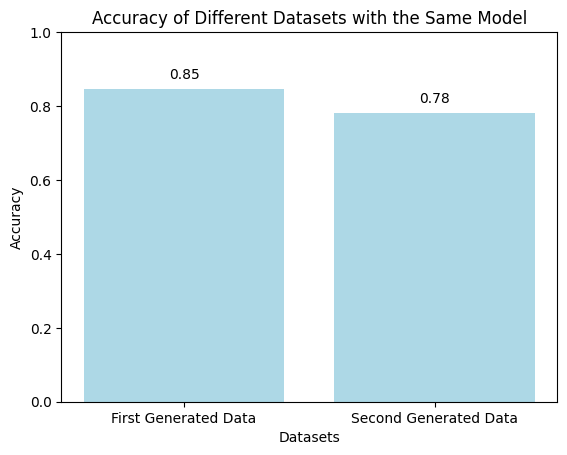

In [78]:


import matplotlib.pyplot as plt

# Example data
datasets = ['First Generated Data', 'Second Generated Data']
accuracies = [accuracy_Gan_1, accuracy_GAN_2]

# Plotting the bar chart
plt.bar(datasets, accuracies, color='lightblue')
plt.xlabel('Datasets')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Datasets with the Same Model')
plt.ylim(0, 1)  # Set the y-axis range if needed (0 to 1 for accuracy)

# Display the values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', va='bottom')

# Show the plot
plt.show()




